# Assn3 - CNN 
Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into categories

In [1]:
import pandas as pd
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
import numpy as np
x_train = train_df.loc[:,train_df.columns != 'label'].to_numpy()
x_train = x_train.reshape([-1,28,28,1])
x_train = x_train/255

In [4]:
x_test = test_df.loc[:,test_df.columns !='label'].to_numpy()
x_test = x_test.reshape([-1,28,28,1])
x_test = x_test/255

In [5]:
y_train = train_df['label'].to_numpy()
y_test = test_df['label'].to_numpy()

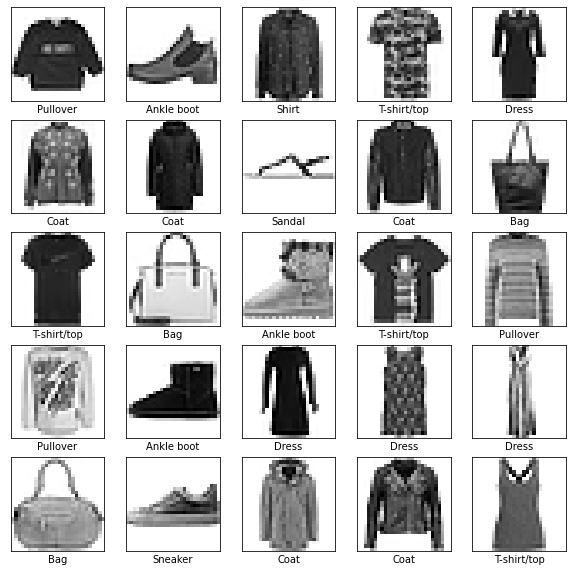

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(rate=0.3))

model.add(Flatten())

model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=10,activation='sigmoid'))

In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 32)                346144    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

In [11]:
model.fit(x_train,y_train,epochs=50,batch_size=1200,validation_split=0.05)

Epoch 1/50
48/48 [==============================] - 18s 365ms/step - loss: 0.9199 - accuracy: 0.6893 - val_loss: 0.5468 - val_accuracy: 0.8137
Epoch 2/50
48/48 [==============================] - 17s 355ms/step - loss: 0.4682 - accuracy: 0.8366 - val_loss: 0.4380 - val_accuracy: 0.8507
Epoch 3/50
48/48 [==============================] - 17s 361ms/step - loss: 0.4004 - accuracy: 0.8593 - val_loss: 0.4188 - val_accuracy: 0.8467
Epoch 4/50
48/48 [==============================] - 18s 372ms/step - loss: 0.3677 - accuracy: 0.8710 - val_loss: 0.3605 - val_accuracy: 0.8753
Epoch 5/50
48/48 [==============================] - 18s 383ms/step - loss: 0.3414 - accuracy: 0.8791 - val_loss: 0.3481 - val_accuracy: 0.8800
Epoch 6/50
48/48 [==============================] - 17s 359ms/step - loss: 0.3265 - accuracy: 0.8856 - val_loss: 0.3306 - val_accuracy: 0.8837
Epoch 7/50
48/48 [==============================] - 17s 345ms/step - loss: 0.3115 - accuracy: 0.8909 - val_loss: 0.3424 - val_accuracy: 0.8797

In [12]:
evaluation = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2228 - accuracy: 0.9235


In [13]:
y_probabilities = model.predict(x_test)
y_pred = y_probabilities.argmax(axis=-1)

313/313 [==============================] - 1s 3ms/step


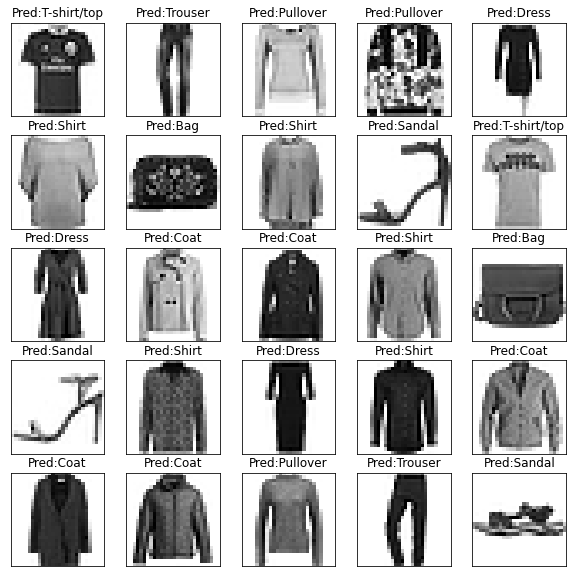

In [14]:
plt.figure(figsize=(10,10),)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap=plt.cm.binary)
#     plt.xlabel(f"True Class:{y_test[i]}")
    plt.title(f"Pred:{class_names[y_pred[i]]}")
plt.show()


In [15]:
from sklearn.metrics import classification_report

In [16]:
num_classes = 10
class_names = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(y_test, y_pred, target_names=class_names)
print(cr) #Or simply just do cr=classification_report(y_test,y_pred) and print it.

              precision    recall  f1-score   support

     class 0       0.86      0.88      0.87      1000
     class 1       0.99      0.99      0.99      1000
     class 2       0.91      0.85      0.88      1000
     class 3       0.93      0.94      0.94      1000
     class 4       0.89      0.90      0.89      1000
     class 5       0.98      0.98      0.98      1000
     class 6       0.78      0.78      0.78      1000
     class 7       0.95      0.97      0.96      1000
     class 8       0.98      0.98      0.98      1000
     class 9       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

